In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Assignment 1:
    Catagorical variables: Product_Catagory & Quality
    Figure out reference category (class 3) (this is comparing smth to the others, so for example how much more expensive the food is compared to the other product categories)
    

In [2]:
df = pd.read_csv('1672182Pet shop.csv')
df.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744
1,2,195042,food,premium,3.9,4,22.0,64.4,3083
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967


In [3]:
PS_dummies = pd.get_dummies(df[['product_category', 'quality']]) 
df = pd.concat([df, PS_dummies], axis = 1)
df.head()

,Unnamed: 0,products_sold,product_category,quality,satisfaction,discount,retail_price,perc_physical,market_size,product_category_food,product_category_health,product_category_other,product_category_toys,quality_off_brand,quality_premium
0,1,162907,toys,premium,4.0,4,30.0,54.2,2744,False,False,False,True,False,True
1,2,195042,food,premium,3.9,4,22.0,64.4,3083,True,False,False,False,False,True
2,3,72749,toys,premium,3.2,9,29.0,41.5,1641,False,False,False,True,False,True
3,4,148853,other,off_brand,4.1,4,14.0,54.2,1832,False,False,True,False,True,False
4,5,192908,health,off_brand,4.2,3,5.0,31.2,2967,False,True,False,False,True,False


In [4]:
df.isnull().sum() #run this before model1 to check what category can be the dependent variable
#At first i tried doing this exercise with retail_price as the dependent variable because i thought it would be an interesting statistic
#But because there are missings in that category the CooksD wouldnt work, so check the df.isnull before picking a dependent variable

Unnamed: 0                   0
products_sold                0
product_category             0
quality                    109
satisfaction                 0
discount                     0
retail_price               155
perc_physical               67
market_size                  0
product_category_food        0
product_category_health      0
product_category_other       0
product_category_toys        0
quality_off_brand            0
quality_premium              0
dtype: int64

In [5]:
df = df.dropna()

In [6]:
model1 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+satisfaction+discount+retail_price+perc_physical+market_size',data=df).fit()
print(model1.summary()) #is product_category the right choice for running this model? also how do i set a reference category

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     774.7
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:46:32   Log-Likelihood:                -22293.
No. Observations:                1941   AIC:                         4.461e+04
Df Residuals:                    1931   BIC:                         4.466e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [7]:
CooksD = model1.get_influence().cooks_distance
n = len(df)
print(CooksD[0])
df['Outlier'] = CooksD[0] > 4/n

[5.78022625e-05 2.21611767e-06 3.24637370e-08 ... 2.50250338e-07
 5.99701135e-05 4.89182802e-08]


In [8]:
df.loc[df['Outlier']==True, 'Outlier'] = np.NaN #turned outliers into NaN (missing values)

/tmp/ipykernel_1437/4027029462.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df.loc[df['Outlier']==True, 'Outlier'] = np.NaN #turned outliers into NaN (missing values)


Assignment 2:

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
df_new = pd.get_dummies(df, dummy_na=True)
#dealed with categorical missing data by adding a quality_nan list to show where data missing

df_imputed = IterativeImputer().fit_transform(df_new)
df_imputed = pd.DataFrame(df_imputed, columns=df_new.columns)
#dealed with continuous missing values by imputing them

In [11]:
import scipy.stats
#checking for multicollinearity
# satisfaction	discount	retail_price	perc_physical	market_size
check1 = scipy.stats.pearsonr(df['satisfaction'], df['discount'])#tuurlijk ben ik meer satisfied als ik een discount krijg
print("satisfaction vs discount:", check1, "pvalue>0,8")
check2 = scipy.stats.pearsonr(df['satisfaction'], df['retail_price'])
print("satisfaction vs retail_price:", check2, "pvalue<0,8")
check3 = scipy.stats.pearsonr(df['satisfaction'], df['perc_physical'])#tuurlijk ben ik meer satisfied als ik bij een fysieke winkel iets koop
print("satisfaction vs perc_physical:", check3, "pvalue>0,8")
check4 = scipy.stats.pearsonr(df['satisfaction'], df['market_size'])
print("satisfaction vs market_size:", check4, "pvalue<0,8")
check5 = scipy.stats.pearsonr(df['discount'], df['retail_price'])
print("discount vs retail_price:", check5, "pvalue<0,8")
check6 = scipy.stats.pearsonr(df['discount'], df['perc_physical'])
print("discount vs perc_physical:", check6, "pvalue<0,8")
check7 = scipy.stats.pearsonr(df['discount'], df['market_size'])
print("discount vs market_size:", check7, "pvalue<0,8")
check8 = scipy.stats.pearsonr(df['retail_price'], df['perc_physical'])
print("retail_price vs perc_physical:", check8, "pvalue<0,8")
check9 = scipy.stats.pearsonr(df['retail_price'], df['market_size'])
print("retail_price vs market_size:", check9, "pvalue<0,8")
check10 = scipy.stats.pearsonr(df['perc_physical'], df['market_size'])
print("perc_physical vs market_size:", check10, "pvalue<0,8")

#what is the more efficient way to do this, this cant be right d^_^b

satisfaction vs discount: PearsonRResult(statistic=-0.0008241124165918244, pvalue=0.9710556223738548) pvalue>0,8
satisfaction vs retail_price: PearsonRResult(statistic=-0.015299567681099855, pvalue=0.5005307271061529) pvalue<0,8
satisfaction vs perc_physical: PearsonRResult(statistic=-0.003157347469726817, pvalue=0.88943963456944) pvalue>0,8
satisfaction vs market_size: PearsonRResult(statistic=-0.009462240162851404, pvalue=0.6769588456635695) pvalue<0,8
discount vs retail_price: PearsonRResult(statistic=-0.020487271542242023, pvalue=0.36699499724615936) pvalue<0,8
discount vs perc_physical: PearsonRResult(statistic=0.030373658827942934, pvalue=0.18102287779931966) pvalue<0,8
discount vs market_size: PearsonRResult(statistic=-0.009086554623334717, pvalue=0.6891014787464546) pvalue<0,8
retail_price vs perc_physical: PearsonRResult(statistic=0.033091245286938006, pvalue=0.1450187673067467) pvalue<0,8
retail_price vs market_size: PearsonRResult(statistic=0.014649064683024347, pvalue=0.518

In [13]:
#to fix this issue i have decided to run a new model without satisfaction.
model2 = sm.ols('products_sold~product_category_food+product_category_health+product_category_other+product_category_toys+quality_off_brand+quality_premium+discount+retail_price+perc_physical+market_size',data=df_imputed).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:          products_sold   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     301.2
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:52:06   Log-Likelihood:                -22991.
No. Observations:                1941   AIC:                         4.600e+04
Df Residuals:                    1932   BIC:                         4.605e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

Assignment 3:

In [14]:
products_sold = df['products_sold']
retail_price = df['retail_price']

scipy.stats.pearsonr(products_sold, retail_price) #<0.05 = significant

PearsonRResult(statistic=-0.07445636268955098, pvalue=0.0010279912055598498)

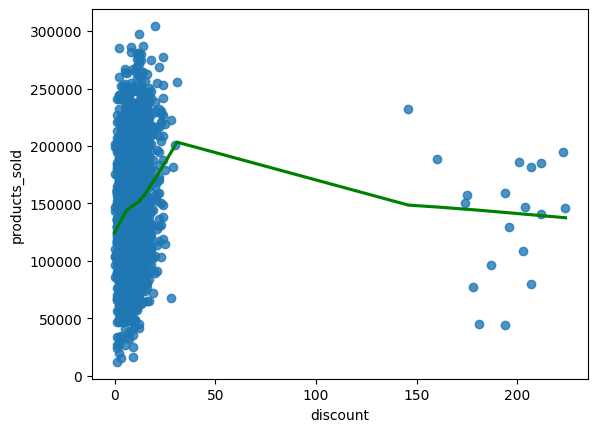

In [25]:
y = df['products_sold']
x = df['discount']

lowessplot = sns.regplot(x = x, y = y, lowess=True, line_kws={"color":"green"})
plt.show(lowessplot)